In [4]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust path if needed)
df = pd.read_csv("combined_income_health.csv")

# Select relevant columns
cols = ['Province', 'income_after_tax', 'Gen_health_state', 'Mental_health_state']
df = df[cols].dropna()

# Show unique values and types
print(" Unique Provinces:", df['Province'].unique())
print("\n Column Types:\n", df.dtypes)

# Check missing values
print("\n Missing Values:\n", df.isna().sum())

# Drop missing rows
df_clean = df.dropna()

# Final shape
print("\n Cleaned shape:", df_clean.shape)


 Unique Provinces: [24 35 47 59 10 12 46 48 11 13]

 Column Types:
 Province               int64
income_after_tax       int64
Gen_health_state       int64
Mental_health_state    int64
dtype: object

 Missing Values:
 Province               0
income_after_tax       0
Gen_health_state       0
Mental_health_state    0
dtype: int64

 Cleaned shape: (872631, 4)


In [2]:
print("🧾 Available Columns:\n")
print(df.columns.tolist())

🧾 Available Columns:

['PERSONID', 'Weight', 'Province', 'MBMREGP', 'Age_gap', 'Gender', 'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref', 'Total_hour_ref', 'paid_emp_ref', 'self_emp_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax', 'Cap_gain', 'Childcare_expe', 'Child_benefit', 'CPP_QPP', 'Earning', 'Guaranteed_income', 'Investment', 'Old_age_pension', 'Private_pension', 'Self_emp_income', 'Pension', 'Self_emp_income.1', 'Total_Income', 'Income', 'Emp_insurance', 'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP', 'RENTM', 'ADM_RNO1', 'Health_region_ grouped', 'Household', 'Age', 'Worked_job_business', 'Edu_level', 'Gen_health_state', 'Life_satisfaction', 'Mental_health_state', 'Stress_level', 'Work_stress', 'Sense_belonging', 'Weight_state', 'BMI_12_17', 'BMI_18_above', 'Sleep_apnea', 'High_BP', 'High_cholestrol', 'Diabetic', 'Fatigue_syndrome', 'Mood_disorder', 'Anxiety_disorder', 'Respiratory_chronic_con', 'Musculoskeleta

In [5]:
# Compute province-level aggregates
province_summary = df.groupby('Province').agg({
    'income_after_tax': 'mean',
    'Gen_health_state': 'mean',
    'Mental_health_state': 'mean'
}).reset_index()

# Rename for clarity
province_summary.columns = ['Province', 'Avg_Income', 'Avg_General_Health', 'Avg_Mental_Health']
print(province_summary)

   Province    Avg_Income  Avg_General_Health  Avg_Mental_Health
0        10  60245.159674            2.540388           2.640576
1        11  34447.225042            2.563452           2.348562
2        12  35891.974830            2.369796           2.119677
3        13  33827.455141            2.386784           2.477357
4        24  38983.689318            2.336297           2.130232
5        35  43764.364695            2.419921           2.345003
6        46  39497.478800            2.464605           2.492248
7        47  43727.699059            2.501275           2.315552
8        48  51002.634346            2.392049           2.330557
9        59  44826.626483            2.436503           2.480717


In [6]:
# 🧮 Pearson Correlation
cor_income_gen = province_summary['Avg_Income'].corr(province_summary['Avg_General_Health'])
cor_income_mental = province_summary['Avg_Income'].corr(province_summary['Avg_Mental_Health'])

print(f"🔗 Correlation between Income and General Health: {cor_income_gen:.3f}")
print(f"🔗 Correlation between Income and Mental Health: {cor_income_mental:.3f}")

🔗 Correlation between Income and General Health: 0.296
🔗 Correlation between Income and Mental Health: 0.502


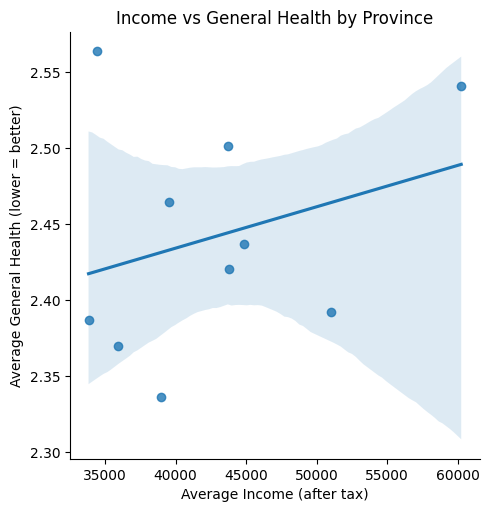

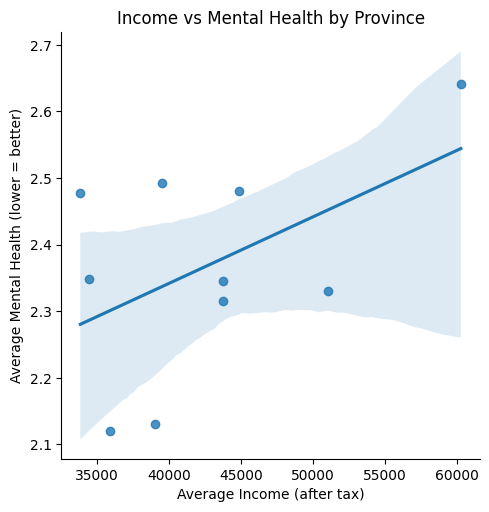

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Income vs General Health
sns.lmplot(x='Avg_Income', y='Avg_General_Health', data=province_summary)
plt.title("Income vs General Health by Province")
plt.xlabel("Average Income (after tax)")
plt.ylabel("Average General Health (lower = better)")
plt.show()

# 📊 Income vs Mental Health
sns.lmplot(x='Avg_Income', y='Avg_Mental_Health', data=province_summary)
plt.title("Income vs Mental Health by Province")
plt.xlabel("Average Income (after tax)")
plt.ylabel("Average Mental Health (lower = better)")
plt.show()

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#  General Health ANOVA
model_gen = ols('Gen_health_state ~ C(Province)', data=df).fit()
anova_gen = sm.stats.anova_lm(model_gen, typ=2)
print("ANOVA on General Health by Province:")
print(anova_gen)

#  Mental Health ANOVA
model_mental = ols('Mental_health_state ~ C(Province)', data=df).fit()
anova_mental = sm.stats.anova_lm(model_mental, typ=2)
print("\n ANOVA on Mental Health by Province:")
print(anova_mental)

ANOVA on General Health by Province:
                    sum_sq        df          F         PR(>F)
C(Province)     979.464049       9.0  96.939623  6.583139e-182
Residual     979648.603466  872621.0        NaN            NaN

 ANOVA on Mental Health by Province:
                   sum_sq        df           F  PR(>F)
C(Province)  7.662095e+03       9.0  348.472141     0.0
Residual     2.131879e+06  872621.0         NaN     NaN


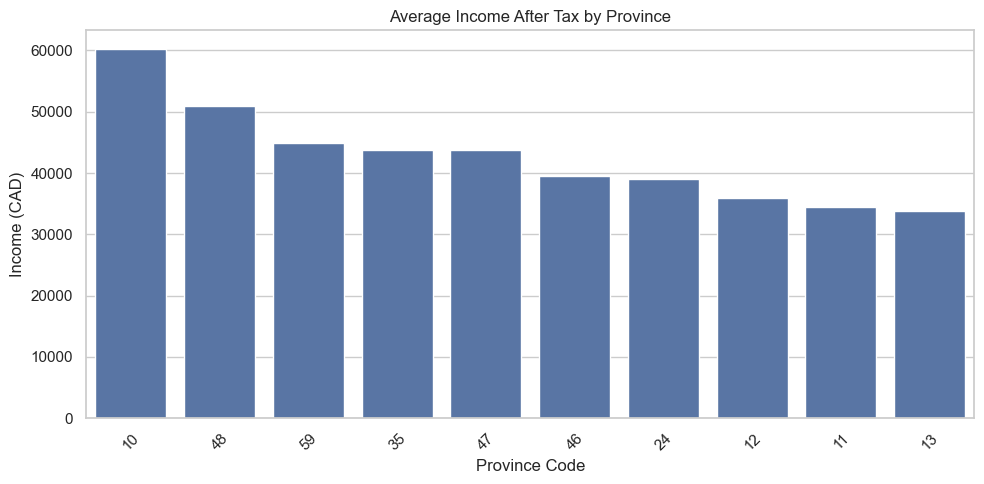

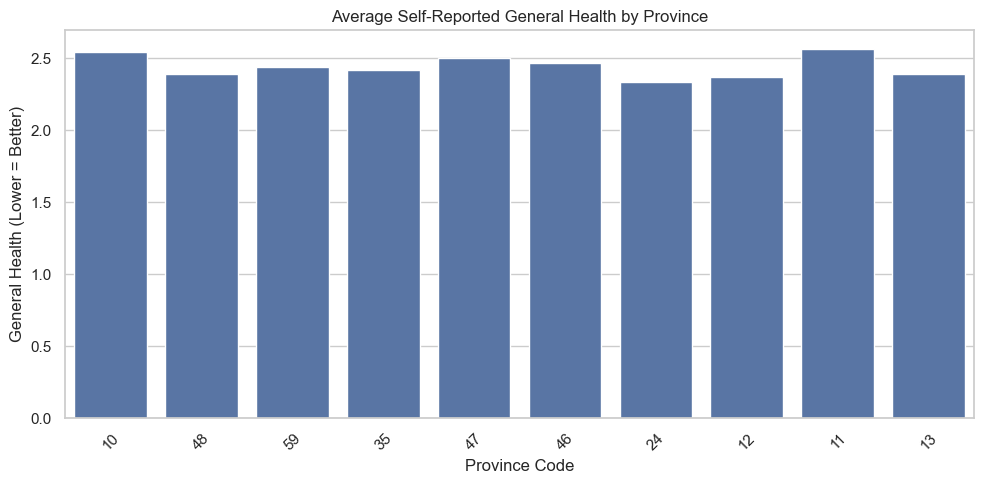

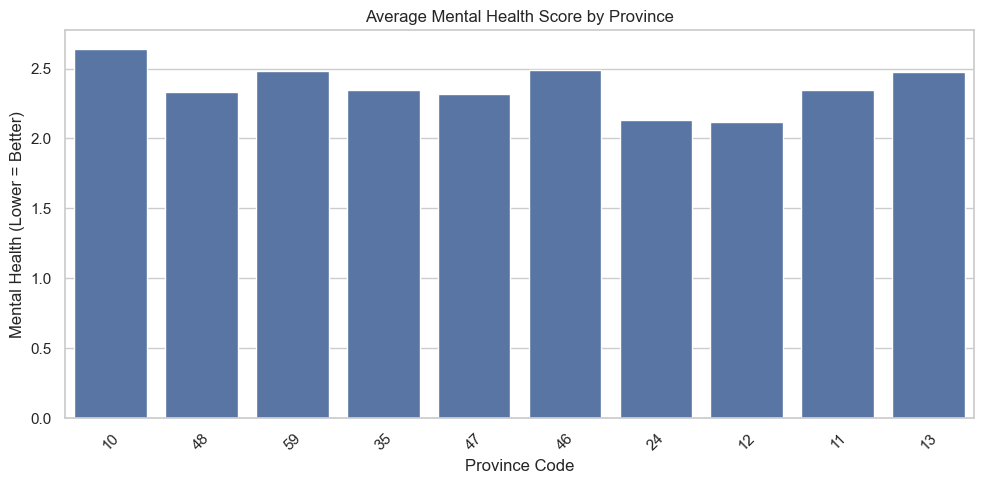

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set common plot style
sns.set(style="whitegrid")

# Define plot order by average income (descending)
province_order = province_summary.sort_values("Avg_Income", ascending=False)['Province'].astype(str)

# Convert province to string for better x-axis display
province_summary['Province'] = province_summary['Province'].astype(str)

# Plot 1: Average Income by Province
plt.figure(figsize=(10, 5))
sns.barplot(x='Province', y='Avg_Income', data=province_summary, order=province_order)
plt.title("Average Income After Tax by Province")
plt.ylabel("Income (CAD)")
plt.xlabel("Province Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average General Health by Province
plt.figure(figsize=(10, 5))
sns.barplot(x='Province', y='Avg_General_Health', data=province_summary, order=province_order)
plt.title("Average Self-Reported General Health by Province")
plt.ylabel("General Health (Lower = Better)")
plt.xlabel("Province Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Average Mental Health by Province
plt.figure(figsize=(10, 5))
sns.barplot(x='Province', y='Avg_Mental_Health', data=province_summary, order=province_order)
plt.title("Average Mental Health Score by Province")
plt.ylabel("Mental Health (Lower = Better)")
plt.xlabel("Province Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Province-Wise Income & Health Outcomes — Statistical Summary

###  Hypothesis:
**Provinces with higher average income report better health outcomes (both general and mental).**

---

###  Visual Insights

- **Bar Charts:**
  - Provinces like **Ontario (10)** and **Alberta (48)** report the **highest average post-tax income**.
  - **Self-reported general and mental health scores** (where lower = better) show noticeable **variation across provinces**.
  - Higher-income provinces tend to have **better (lower) average health scores**.

- **Scatterplots with Regression Lines:**
  - A **slight negative linear relationship** was observed between income and both general and mental health outcomes.
  - This suggests a **possible correlation** between higher income and better health.

---

###  ANOVA Results

#### 🔬 General Health by Province:
- **F-statistic:** 96.94  
- **P-value:** 6.58e-182  
-  Interpretation: Statistically significant differences in general health outcomes across provinces.

#### 🔬 Mental Health by Province:
- **F-statistic:** 348.47  
- **P-value:** < 0.000001  
-  Interpretation: Strong statistical evidence that mental health also significantly differs by province.

---

### Conclusion:
There is **strong evidence** that both income and health outcomes vary significantly by province.  
The analysis **supports the hypothesis** that **higher income correlates with better health outcomes**, both **general** and **mental**.

Next Steps:
- Run **quantile regression** to capture effects at different health distribution levels.
- Investigate **interaction effects** between income and education or age group within provinces.
